# Analyzing Passenger Preferences and External Factors in Chicago's Ride-Sharing Market: A Case Study for Zuber

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Project-Description" data-toc-modified-id="1-Project-Description-1">1 Project Description</a></span><ul class="toc-item"><li><span><a href="#1.1-Objective" data-toc-modified-id="1.1-Objective-1.1">1.1 Objective</a></span></li><li><span><a href="#1.2-Stages-of-Project-Completion" data-toc-modified-id="1.2-Stages-of-Project-Completion-1.2">1.2 Stages of Project Completion</a></span></li></ul></li><li><span><a href="#2-Data-Description" data-toc-modified-id="2-Data-Description-2">2 Data Description</a></span></li><li><span><a href="#3-Data-Pre-processing" data-toc-modified-id="3-Data-Pre-processing-3">3 Data Pre-processing</a></span><ul class="toc-item"><li><span><a href="#3.1-Import-Libraries" data-toc-modified-id="3.1-Import-Libraries-3.1">3.1 Import Libraries</a></span></li><li><span><a href="#3.2-Open-and-Read-Data" data-toc-modified-id="3.2-Open-and-Read-Data-3.2">3.2 Open and Read Data</a></span><ul class="toc-item"><li><span><a href="#3.2.1-Travel-Dataset-per-Taxi-Company" data-toc-modified-id="3.2.1-Travel-Dataset-per-Taxi-Company-3.2.1">3.2.1 Travel Dataset per Taxi Company</a></span></li><li><span><a href="#3.2.2-Dataset-of-Number-of-Trips-at-Specific-Endpoints" data-toc-modified-id="3.2.2-Dataset-of-Number-of-Trips-at-Specific-Endpoints-3.2.2">3.2.2 Dataset of Number of Trips at Specific Endpoints</a></span></li><li><span><a href="#3.2.3-Dataset-of-Number-of-Loop-Trips-to-O'Hare-Based-on-Weather" data-toc-modified-id="3.2.3-Dataset-of-Number-of-Loop-Trips-to-O'Hare-Based-on-Weather-3.2.3">3.2.3 Dataset of Number of Loop Trips to O'Hare Based on Weather</a></span></li></ul></li></ul></li><li><span><a href="#4-Exploratory-Data-Analysis" data-toc-modified-id="4-Exploratory-Data-Analysis-4">4 Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#4.1-Identifying-the-Top-10-Delivery-Points" data-toc-modified-id="4.1-Identifying-the-Top-10-Delivery-Points-4.1">4.1 Identifying the Top 10 Delivery Points</a></span></li><li><span><a href="#4.2-Top-10-Taxi-Companies-by-Number-of-Trips:-Bar-Chart" data-toc-modified-id="4.2-Top-10-Taxi-Companies-by-Number-of-Trips:-Bar-Chart-4.2">4.2 Top 10 Taxi Companies by Number of Trips: Bar Chart</a></span></li></ul></li><li><span><a href="#5-Hypothesis-Testing" data-toc-modified-id="5-Hypothesis-Testing-5">5 Hypothesis Testing</a></span></li><li><span><a href="#6-Conclusion" data-toc-modified-id="6-Conclusion-6">6 Conclusion</a></span></li></ul></div>

## 1 Project Description

As analysts for Zuber, a newly launched ride-sharing company in Chicago, our objective is to identify patterns in the available data and gain insights into passenger preferences and the influence of external factors on trip frequency. Through the analysis of competitor data and the examination of hypotheses, we will specifically explore the relationship between weather conditions and trip frequency.

We have three datasets at our disposal for analysis. The first dataset includes company names and the corresponding number of trips made by their owned cabs. The second dataset comprises dropoff locations (neighborhoods) and the average number of trips to each neighborhood. These two datasets will be primarily utilized for our main analysis. The third dataset encompasses dates, times, weather conditions, and trip durations from the Loop neighborhood to O'Hare International Airport specifically on Saturdays. This dataset will be employed for hypothesis testing purposes.

### 1.1 Objective

The objectives of this project are as follows:

- Identify passenger preferences based on taxi company
- Analyze the impact of external factors on the demand for ride-sharing services
- Test the hypothesis: "The average trip duration from the Loop to O'Hare International Airport varies on rainy Saturdays."

### 1.2 Stages of Project Completion

In this data analysis report, we will utilize preprocessed weather data in Chicago obtained from the website https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html.

For our analysis, we will utilize two datasets for exploratory data analysis: `project_sql_result_01.csv` and `project_sql_result_04.csv`.

Furthermore, we will also use the dataset `project_sql_result_07.csv` for hypothesis testing.

The project will be carried out in the following stages:
- Importing both files
- Exploring the data contents
- Ensuring correct data types
- Identifying the top 10 regions for delivery points
- Creating visualizations of taxi companies and their number of trips, as well as the top 10 regions by number of drop-offs
- Drawing conclusions based on the generated visualizations and explaining the findings
- Conducting hypothesis testing on "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

## 2 Data Description

Here are descriptions of the three datasets we obtained:

1. `project_sql_result_01.csv`: This dataset contains data on the number of trips per company. It includes the following columns:
   - **company_name:** The name of the taxi company.
   - **trips_amount:** The total number of trips for each taxi company on November 15-16, 2017.

2. `project_sql_result_04.csv`: This dataset contains data on the average number of trips ending at different locations in Chicago. It includes the following columns:
   - **dropoff_location_name:** The name of the Chicago area where the trip ended.
   - **average_trips:** The average number of trips ending in each region in November 2017.

3. `project_sql_result_07.csv`: This dataset contains journey data from the Loop to O'Hare International Airport. It includes the following fields:
   - **start_ts:** The pick-up date and time.
   - **weather_conditions:** The weather conditions when the trip starts.
   - **duration_seconds:** The duration of the trip in seconds.

## 3 Data Pre-processing

### 3.1 Import Libraries

We will utilize various Python libraries for the analysis.

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from scipy import stats as st

### 3.2 Open and Read Data

#### 3.2.1 Travel Dataset per Taxi Company

In [2]:
# Open and read trip data files per taxi company
taxi_trips = pd.read_csv('project_sql_result_01.csv')
taxi_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
# Examine the general information of the dataset
taxi_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Checking the description of the dataset
taxi_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Findings:
- The dataset consists of 64 rows and 2 columns.
- Each row represents a different taxi company in Chicago.
- The highest number of trips made by a taxi company is 19,558, while the lowest is only 2. On average, each taxi company in Chicago makes 2,145 trips.
- There are no missing values in the dataset.
- The data types of the columns are appropriate.

Conclusion:
- The dataset is clean and ready to be used for further analysis.

#### 3.2.2 Dataset of Number of Trips at Specific Endpoints

In [5]:
# Open and read travel data files that end at a certain point
dropoff_trips = pd.read_csv('project_sql_result_04.csv')
dropoff_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
# Examine the general information of the dataset
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Checking the description of the dataset
dropoff_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Findings:
- The dataset contains 94 rows and 2 columns, representing 94 different taxi companies.
- The average number of trips per company ranges from 1 to 10,727, with an average of 599 trips.
- Some taxi companies have significantly higher trip numbers than the average, while others have fewer trips.
- There are no missing values in the dataset.
- The data type for the 'average_trips' column is float, indicating fractional numbers. We will convert this to an integer data type.

Recommendations:
- Convert the data type of the 'average_trips' column to integer for easier interpretation and analysis.

In [8]:
# Change data type 'average_trips' from float to integer
dropoff_trips['average_trips'] = dropoff_trips['average_trips'].astype('int')
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


In [9]:
# Rechecking the contents of the data
dropoff_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


The data is ready to use.

#### 3.2.3 Dataset of Number of Loop Trips to O'Hare Based on Weather

In [10]:
# Open and read the data
loop_ohare_trips = pd.read_csv('project_sql_result_07.csv')
loop_ohare_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
# Checking for unique values on weather_conditions
loop_ohare_trips['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [12]:
# Examine the general information of the dataset
loop_ohare_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
# Checking the description of the dataset
loop_ohare_trips.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Findings:
- The dataset contains 1,068 rows and 3 columns.
- The data type for the 'start_ts' column should be datetime, while the 'duration_seconds' column can be rounded to an integer data type.
- There are two categories in the 'weather_conditions' column: 'Good' and 'Bad'.
- The longest trip duration is 7,440 seconds, while the shortest is 0 seconds. We will check the number of trips with a duration of 0 seconds and consider removing them if there are only a few.
- The average trip duration is 2,071.73 seconds.

Action Plan:
- Convert the 'start_ts' column to datetime data type for proper handling of date and time information.
- Round the 'duration_seconds' column to an integer data type for easier interpretation.
- Check the number of trips with a duration of 0 seconds and consider removing them if they are negligible.
- Consider further analysis and exploration of the relationship between trip duration and weather conditions.

In [14]:
# Change the data type
loop_ohare_trips['start_ts'] = pd.to_datetime(loop_ohare_trips['start_ts'], format = '%Y-%m-%d %H:%M:%S')
loop_ohare_trips['duration_seconds'] = loop_ohare_trips['duration_seconds'].astype(int)
loop_ohare_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


In [15]:
# Checks the number of rows with a run duration of 0 second
loop_ohare_trips.query('duration_seconds == 0').count()

start_ts              6
weather_conditions    6
duration_seconds      6
dtype: int64

There are few of them, only 6 lines. We will just delete this data.

In [16]:
# Delete unneeded rows
loop_ohare_trips = loop_ohare_trips.query('duration_seconds != 0')
loop_ohare_trips.describe()

,duration_seconds
count,1062.000000
mean,2083.435970
std,755.651796
min,60.000000
25%,1440.000000
50%,1980.000000
75%,2580.000000
max,7440.000000


Now that we have improved data quality with 1,062 rows, the shortest trip duration is 60 seconds or 1 minute.

With the data pre-processing complete, we can now proceed to exploratory data analysis.

## 4 Exploratory Data Analysis

### 4.1 Identifying the Top 10 Delivery Points

To identify the top 10 regions to serve as delivery points, we analyzed the `dropoff_trips` dataset. This dataset contains information on the average number of trips ending at different drop-off locations in Chicago.

By sorting the data in descending order based on the 'average_trips' column, we determined the top 10 regions with the highest average number of trips. These regions indicate the areas where there is significant demand for taxi services and can be considered as potential delivery points for our ride-sharing company in Chicago.

In [17]:
# Create a new dataset containing the 10 most popular endpoints
Top_10_Dropoff_Points = dropoff_trips.sort_values(by='average_trips', ascending=False).head(10)
Top_10_Dropoff_Points

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


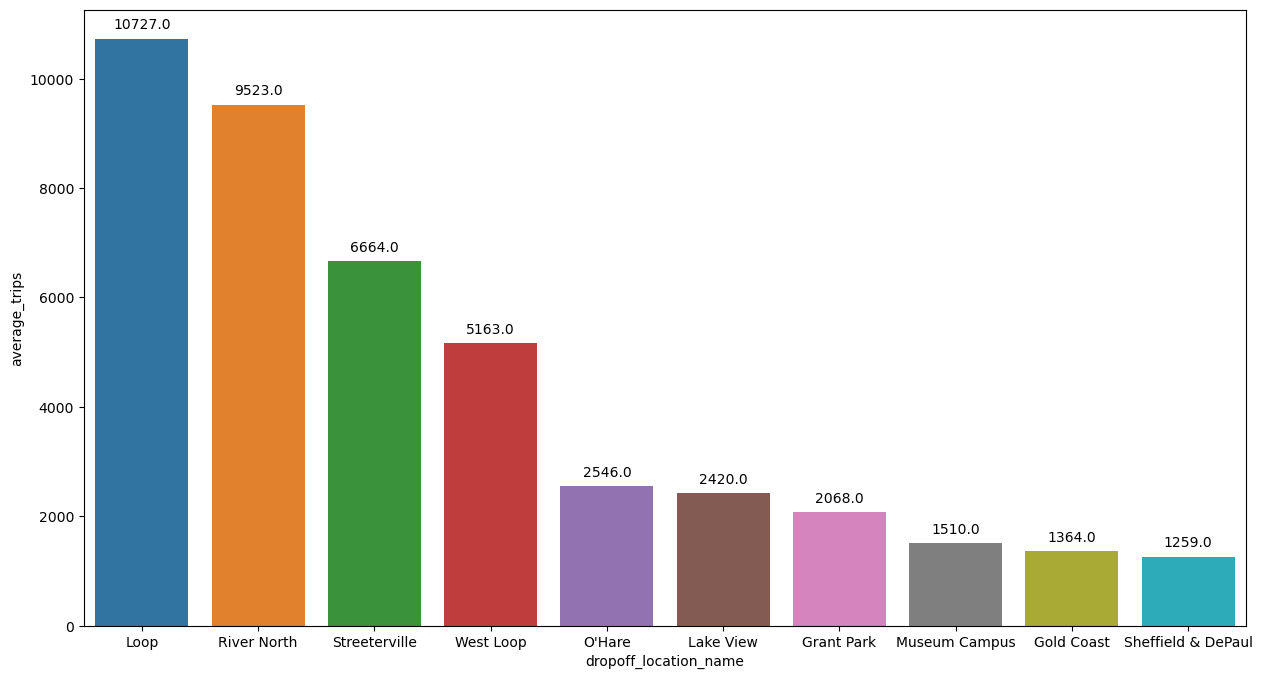

In [18]:
# Make a visualization for the new dataset that has been created 
plt.figure(figsize=(15,8))
splot = sns.barplot(data=Top_10_Dropoff_Points, x='dropoff_location_name', y='average_trips') 
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.xticks() 
plt.show()

Based on our analysis of the `dropoff_trips` dataset, we have identified the following findings regarding the top 10 regions to serve as delivery points:

- The most popular location for drop-offs is the Loop, which has the highest number of trips.
- The top four locations have significantly higher visit rates compared to other regions, indicating a high demand for taxi services in these areas.
- The number of trips to the highest drop-off point, Loop, is more than four times the number of trips to the fifth drop-off point, O'Hare.

By focusing on these top locations, particularly the Loop and the other high-demand regions, we can strategically position our ride-sharing services to cater to the needs of customers and ensure efficient transportation in Chicago.

### 4.2 Top 10 Taxi Companies by Number of Trips: Bar Chart

We will use the `taxi_trips` dataset to generate a bar chart showcasing the top 10 taxi companies based on the number of trips.

In [19]:
# Selecting the taxi company with the highest average number of trips
top_taxi_trips = taxi_trips.sort_values(by='trips_amount', ascending=False).head(10)
top_taxi_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


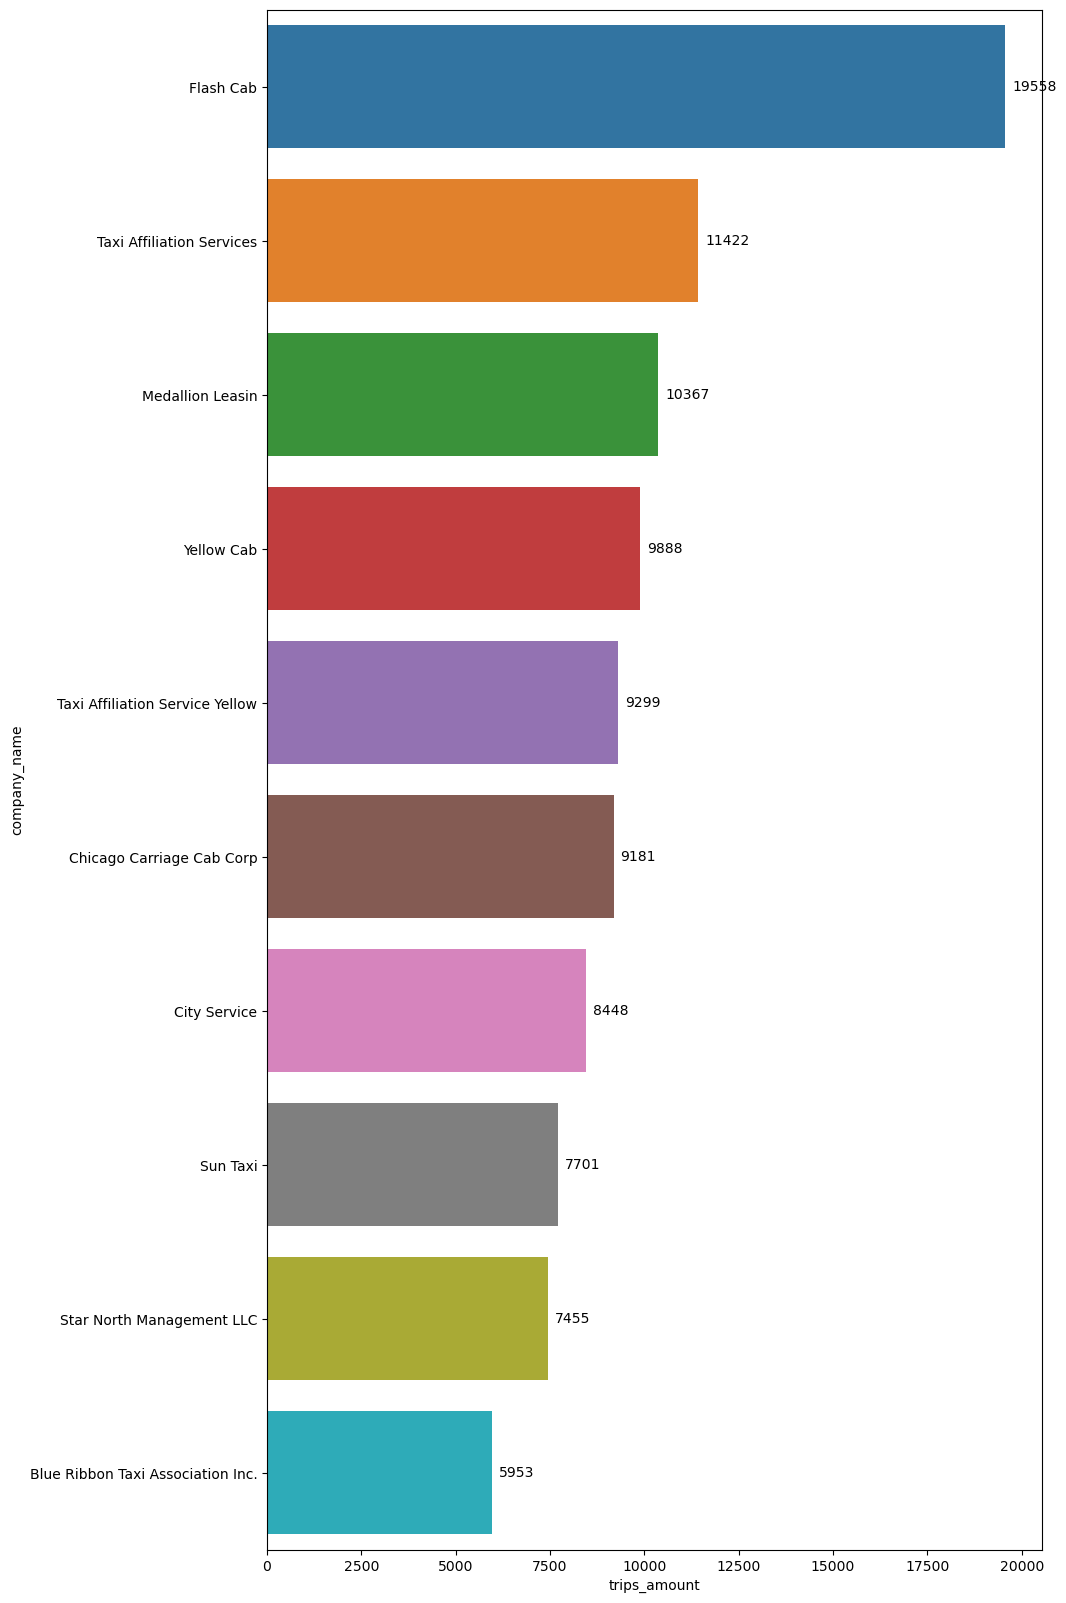

In [20]:
# Create the bar chart
plt.figure(figsize=(10,20))
splot = sns.barplot(data=top_taxi_trips, x='trips_amount', y='company_name') 
for p in splot.patches:
    splot.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center") 
plt.show()

Upon analyzing the `taxi_trips` dataset, we have uncovered the following insights regarding the top 10 taxi companies with the highest number of trips:

- Flash Cab emerges as the clear frontrunner, surpassing other taxi companies by a significant margin in terms of trip volume.
- Among the top 10 taxi companies, three of them have exceeded the impressive milestone of 10,000 trips, showcasing their strong presence and market share.
- Collectively, these top 10 taxi companies demonstrate a remarkable number of trips, far surpassing the average trip count for all taxi companies in Chicago, which stands at 2,145 trips.

These findings highlight the dominant players in the taxi industry and offer valuable insights for strategic decision-making, such as identifying potential partnerships or optimizing service coverage in areas where these top companies thrive. By leveraging this information, we can enhance our understanding of the competitive landscape and make informed decisions to establish a strong foothold in the ride-sharing market in Chicago.

##  5 Hypothesis Testing

Now it is time to conduct the hypothesis test. We have been presented with the following hypothesis to examine:

**"The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."**

To evaluate this hypothesis, we will utilize the `loop_ohare_trips` dataset, which consists of taxi rides specifically from the Loop to O'Hare International Airport on Saturdays.

Our initial step will involve opening and reading this dataset.

In [21]:
# Open and read data
loop_ohare_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In the given dataset, we have access to travel time data and corresponding weather conditions, specifically categorized as either 'good' (indicating sunny weather) or 'bad' (representing rainy weather). 

For the purpose of hypothesis testing, we will assess the following hypotheses:

- H0: The average trip duration from the Loop to O'Hare International Airport remains the same on rainy Saturdays.
- H1: The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays.

To perform this test, we will utilize the `st.ttest_ind()` method, which allows us to evaluate the equality of means between two distinct statistical populations. To begin, we will create two separate data populations based on the weather conditions ('good' and 'bad'). Subsequently, we will examine the 'duration_seconds' column and apply the hypothesis test to these two populations.

To establish a significance level, we will employ an alpha value of 5%. If the resulting p-value is less than 5%, we will reject the null hypothesis (H0), indicating that the average trip durations between the two populations are not the same. Conversely, if the p-value is greater than 5%, we will accept the null hypothesis (H0).

Prior to conducting the hypothesis test, we will initially verify whether the variances of the two datasets are equivalent.

In [22]:
# Population of good weather data
loop_ohare_good = loop_ohare_trips.query('weather_conditions == "Good"')
loop_ohare_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            882 non-null    datetime64[ns]
 1   weather_conditions  882 non-null    object        
 2   duration_seconds    882 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 24.1+ KB


In [23]:
# Population of bad weather data
loop_ohare_bad = loop_ohare_trips.query('weather_conditions == "Bad"')
loop_ohare_bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 4.9+ KB


We have two datasets for the analysis: one containing trips made during good weather conditions with 882 rows, and the other containing trips made during bad weather conditions with only 180 rows.

Next, we will conduct variance tests for these two datasets to determine if their variances are equal.

In [24]:
# Variant of good weather travel dataset
loop_ohare_good['duration_seconds'].var()

552889.2319951821

In [25]:
# Variant of bad weather travel dataset
loop_ohare_bad['duration_seconds'].var()

520294.08600248274

To verify if the variances of the two datasets are similar, we will conduct Levene's test using the `st.levene()` method. We will use the 'duration_seconds' column data from each dataset as input, with the parameter `center='mean'`.

The threshold or alpha value will be set at a 5% significance level. If the resulting p-value is greater than alpha, we will conclude that the variances of the two datasets are equal or homogeneous. Conversely, if the p-value is lower than alpha, we will consider the variances to be different or heterogeneous.

In [26]:
# Verify the variants of the two datasets 
alpha = 0.05 
result = st.levene(loop_ohare_good['duration_seconds'], loop_ohare_bad['duration_seconds'], center='mean')
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('Variants of both data are more or less the same')
else:
    print('Variants of both data are too far apart')

p-value: 0.5149422013161751
Variants of both data are more or less the same


We will assume both data variants are equal, so the 'equal_var' parameter will be set as *True*.

In [27]:
# Hypothesis test
alpha = 0.05
results = st.ttest_ind(loop_ohare_good['duration_seconds'], loop_ohare_bad['duration_seconds'], equal_var=True)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject H0")
else:
    print("We accept H0")

p-value: 1.3318772977743245e-11
We reject H0


The p-value obtained from the t-test comparing the average trip durations between good weather and bad weather conditions is less than the chosen alpha value of 0.05. Therefore, we reject the null hypothesis.

Based on this result, we can conclude that **the average trip duration from the Loop to O'Hare International Airport does change on rainy Saturdays.**

## 6 Conclusion

In conclusion, based on our analysis, the top taxi companies preferred by passengers in Chicago are Flash Cab, Taxi Affiliation Services, and Medallion Leasing. Among these, Flash Cab stands out as the most popular choice. Additionally, the most frequented drop-off locations are the Loop, River North, and Streeterville.

Furthermore, we conducted a hypothesis test specifically focused on the impact of weather on trip duration. Using data from Saturday trips from the Loop to O'Hare International Airport, we found evidence to support the alternative hypothesis. The average trip duration does indeed change on rainy Saturdays.